In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-image/chest_xray_image.png
/kaggle/input/toolsimage/shapes52.jpg
/kaggle/input/building-image/building_image.jpg
/kaggle/input/landscape-image/noise-noisy-nature.jpg
/kaggle/input/friends-image/face_det_friends22.jpg
/kaggle/input/dogs-banner1/dogs_banner.jpg
/kaggle/input/upper-r-image/r5.png
/kaggle/input/gfruit-image/toronjas.jpg
/kaggle/input/soaps-image/soap_image.jpg
/kaggle/input/dices-image/dices.png
/kaggle/input/profile-image/face_det9.jpg
/kaggle/input/berryfruitsimage/fruits-2.jpg
/kaggle/input/group-image/face_det25.jpg
/kaggle/input/night-image/face_det3.jpg
/kaggle/input/noisy-image-1/miny.jpeg
/kaggle/input/chess-pieces-image/bw.jpg
/kaggle/input/world-image/world_image_binary.jpg
/kaggle/input/image-with-logo/4.2.06_w_logo_2_2.png
/kaggle/input/image-cat-rotated/image_cat.jpg
/kaggle/input/aerial-image/image_aerial.tiff
/kaggle/input/face-image/chinese.jpg
/kaggle/input/sixties-lady-image/4.1.01.tiff
/kaggle/input/fruits-image/fruits_square.jpg

##  Image Processing and Scikit-image

### Scikit-image

In [4]:
import skimage
print(skimage.__version__)

0.19.3


In [5]:
#function to visualize images
import matplotlib.pyplot as plt

def show_image(image, title='Image', cmap_type='gray'):
    '''Custom function to plot image from array'''
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
#     plt.axis('off')
    plt.show()

#### RGB to grayscale

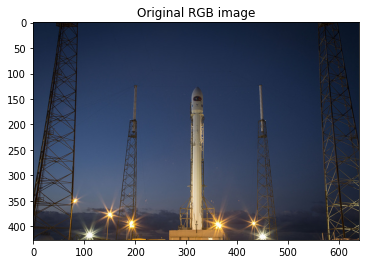

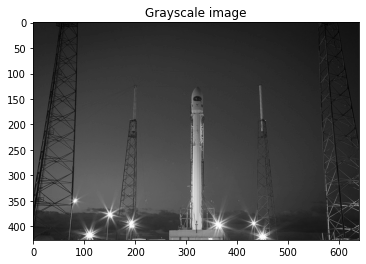

In [6]:
# Import the modules from skimage
from skimage import data, color

# Load the rocket image from skimage
rocket = data.rocket()

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

# Show the original image
show_image(rocket, 'Original RGB image')

# Show the grayscale image
show_image(gray_scaled_rocket, 'Grayscale image')

#### Flipping out

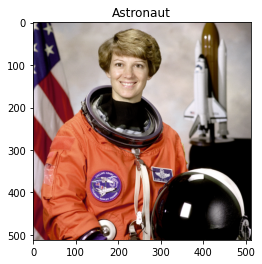

In [7]:
astronaut = data.astronaut()

show_image(astronaut, 'Astronaut')

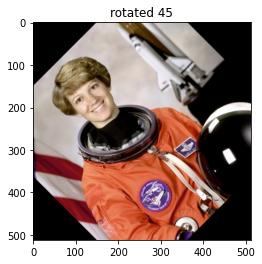

In [10]:
from skimage.transform import rotate

rotate = rotate(astronaut, 45)
show_image(rotate, 'rotated 45')

In [ ]:
upside_down = np.flipud(astronaut)
show_image(upside_down, 'upside_down')

In [ ]:
left_right = np.fliplr(upside_down)
show_image(left_right, 'left_right')

#### Histograms

In [ ]:
# load own images a numpy arrays from image files
from skimage import io

image = io.imread('../input/sixties-lady-image/4.1.01.tiff')
show_image(image)

In [ ]:
# Obtaining the red values of the image
red_channel = image[:, :, 0]

# Obtaining the green values of the image
green_channel = image[:, :, 1]

# Obtaining the blue values of the image
blue_channel = image[:, :, 2]

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15,3))

axs[0].imshow(red_channel)
axs[0].set_title('Red Channel')
axs[1].imshow(green_channel)
axs[1].set_title('Green Channel')
axs[2].imshow(blue_channel)
axs[2].set_title('Blue Channel')

plt.show()

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15,3), sharey=True)

axs[0].hist(red_channel.ravel(), bins=256, color='red')
axs[0].set_title('Red Histogram')

axs[1].hist(green_channel.ravel(), bins=256, color='green')
axs[1].set_title('Green Histogram')

axs[2].hist(blue_channel.ravel(), bins=256, color='blue')
axs[2].set_title('Blue Histogram')

plt.show()

With this histogram we see that the image is quite reddish, meaning it has a sensation of warmness. This is because it has a wide and large distribution of bright red pixels, from 0 to around 150.

### Thresholding
Partitioning an image into a foreground and background by making it black and white

#### Apply global thresholding

In [ ]:
chess_pieces_image = io.imread('../input/chess-pieces-image/bw.jpg')
show_image(chess_pieces_image, 'chess image')

In [ ]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu

# Make the image grayscale using rgb2gray
chess_pieces_image_gray = color.rgb2gray(chess_pieces_image)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(chess_pieces_image_gray)

# Apply thresholding to the image
binary = chess_pieces_image_gray > thresh

# Show the image
show_image(binary, 'Binary image')

#### When the background isn't that obvious
If the image background is relatively uniform, then you can use a global threshold value as before, using threshold_otsu(). However, if there's uneven background illumination, adaptive thresholding threshold_local() (a.k.a. local thresholding) may produce better results.

In [ ]:
# Import the local threshold function
from skimage.filters import threshold_local

# Original image
page_image = data.page()
show_image(page_image, 'Original')

# Obtain the global_thresh optimal threshold value with otsu
global_thresh = threshold_otsu(page_image)
binary_global = page_image > global_thresh
show_image(binary_global, 'Global thresholding')


# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(page_image, block_size, offset=10)

# Obtain the binary image by applying local thresholding
binary_local = page_image > local_thresh

# Show the binary image
show_image(binary_local, 'Local thresholding')

#### Trying other methods
Scikit-image provides us with a function to check multiple methods and see for ourselves what the best option is. It returns a figure comparing the outputs of different global thresholding methods.

In [ ]:
from skimage.filters import try_all_threshold
from skimage.color import rgb2gray

fruits_image = io.imread('/kaggle/input/berryfruitsimage/fruits-2.jpg')

# Turn the fruits_image to grayscale
grayscale = rgb2gray(fruits_image)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(grayscale, verbose=False)

# Show the resulting plots
plt.show()

#### Apply thresholding

In [ ]:
from skimage.filters import try_all_threshold
from skimage.color import rgb2gray

tools_image = io.imread('/kaggle/input/toolsimage/shapes52.jpg')

# Turn the tools_image to grayscale
grayscale = rgb2gray(tools_image)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(grayscale, verbose=False)

# Show the resulting plots
plt.show()

Otsu for the win! By using a global thresholding method, you obtained the precise binarized image. If you would have used local instead nothing would have been segmented.

## Filters, Contrast, Transformation and Morphology

### Filtering

In [ ]:
def plot_comparison(original, filtered, title_filtered):
    '''Custom function to plot original image next to filtered/processed image'''
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,6), sharex=True, sharey=True)
    
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title("Original")
    ax1.axis=('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis=('off')

#### Edge detection

In [ ]:
soaps_image = io.imread('/kaggle/input/soaps-image/soap_image.jpg')

In [ ]:
# Import the color module
from skimage import color

# Import the filters module and sobel function
from skimage.filters import sobel

# Make the image grayscale
soaps_image_gray = color.rgb2gray(soaps_image)

# Apply edge detection filter
edge_sobel = sobel(soaps_image_gray)

# Show original and resulting image to compare
plot_comparison(soaps_image, edge_sobel, "Edges with Sobel")

Great job! You succesfully detected the edges in the image.
As you can see, the edges of all the figures in the scene are highlighted.

#### Blurring to reduce noise

In [ ]:
building_image = io.imread('/kaggle/input/building-image/building_image.jpg')

In [ ]:
# Import Gaussian filter 
from skimage.filters import gaussian

# Apply filter
gaussian_image = gaussian(building_image, channel_axis=3)

# Show original and resulting image to compare
plot_comparison(building_image, gaussian_image, "Reduced sharpness Gaussian")

Awesome! You have removed the excessive sharpness in the image.

### Contrast enhancement

In [ ]:
def plot_hist_comparison(original, adjusted, title_adjusted):
    '''Custom function to plot histograms of images'''

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,6), sharey=True)
    
    ax1.hist(original.ravel(), bins=256)
    ax1.set_title('Histogram of original')
    ax1.axis=('off')
    ax2.hist(adjusted.ravel(), bins=256)
    ax2.set_title(title_adjusted)
    ax2.axis=('off')

#### Medical Images

In [ ]:
chest_xray_image = io.imread('/kaggle/input/chest-xray-image/chest_xray_image.png')

In [ ]:
# Import the required module
from skimage import exposure

# Use histogram equalization to improve the contrast
xray_image_eq =  exposure.equalize_hist(chest_xray_image)

# Show the resulting image
plot_comparison(chest_xray_image, xray_image_eq, 'Resulting image')

# Show histograms
plot_hist_comparison(chest_xray_image, xray_image_eq, 'Histogram of equalized hist image')



#### Aerial image

In [ ]:
aerial_image = io.imread('/kaggle/input/aerial-image/image_aerial.tiff')

In [ ]:
# Import the required module
from skimage import exposure

# Use histogram equalization to improve the contrast
image_eq =  exposure.equalize_hist(aerial_image)

# Show the original and resulting image
plot_comparison(aerial_image, image_eq, 'Resulting image')

plot_hist_comparison(aerial_image, image_eq, 'Resulting image')

#### Add some impact and contrast
Have you ever wanted to enhance the contrast of your photos so that they appear more dramatic?

In [ ]:
# Import the necessary modules
from skimage import data, exposure

# Load the image
original_image = data.coffee()

# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03)

# Compare the original image to the equalized
plot_comparison(original_image, adapthist_eq_image, 'ImageProcessed')

plot_hist_comparison(original_image, adapthist_eq_image, 'ImageProcessed')

Amazing! You have increased the contrast of the image using an algorithm for local contrast enhancement, that uses histograms computed over different tile regions of the image. Local details can therefore be enhanced even in regions that are darker or lighter than the rest of the image.

### Transformations

#### Aliasing, rotating and rescaling

Let's look at the impact of aliasing on images.

Remember that aliasing is an effect that causes different signals, in this case pixels, to become indistinguishable or distorted.

In [ ]:
image_cat = io.imread('/kaggle/input/image-cat-rotated/image_cat.jpg')

In [ ]:
# Import the module and the rotate and rescale functions
from skimage.transform import rotate, rescale

# Rotate the image 90 degrees clockwise 
rotated_cat_image = rotate(image_cat, -90)

# Rescale with anti aliasing
rescaled_with_aa = rescale(rotated_cat_image,1/4, anti_aliasing=True, channel_axis=2)

# Rescale without anti aliasing
rescaled_without_aa = rescale(rotated_cat_image,1/4,  anti_aliasing=False, channel_axis=2)

# Show the resulting images
show_image(rotated_cat_image, 'Original')
show_image(rescaled_with_aa, "Transformed with anti aliasing")
show_image(rescaled_without_aa, "Transformed without anti aliasing")

Seems like the anti aliasing filter prevents the poor pixelation effect to happen, making it look better but also less sharp.

#### Enlarging images

In [ ]:
# Import the module and function to enlarge images
from skimage.transform import rescale

# Import the data module
from skimage import data

# Load the image from data
rocket_image = data.rocket()

# Enlarge the image so it is 3 times bigger
enlarged_rocket_image = rescale(rocket_image, 3, anti_aliasing=True, channel_axis=2)

# Show original and resulting image
plot_comparison(rocket_image,enlarged_rocket_image, "3 times enlarged image")

The image went from being 600 pixels wide to over 1700 and it still does not look poorly pixelated. Nice work!

#### Proportionally resizing

In [ ]:
dogs_banner = io.imread('/kaggle/input/dogs-banner1/dogs_banner.jpg')
show_image(dogs_banner)

In [ ]:
dogs_banner.shape

In [ ]:
# Import the module and function
from skimage.transform import resize

# Set proportional height so its half its size
height = int(dogs_banner.shape[0] / 2)
width = int(dogs_banner.shape[1] / 2)

# Resize using the calculated proportional height and width
image_resized = resize(dogs_banner, (height, width),
                       anti_aliasing=True)

# Show the original and resized image
plot_comparison(dogs_banner, image_resized, 'Resized image')

Rescale operation resizes an image by a given scaling factor. The scaling factor can either be a single floating point value, or multiple values - one along each axis. Resize serves the same purpose, but allows to specify an output image shape instead of a scaling factor.

### Morphology
Improve the definition of binary and grayscale images so that it's easier to classify. 
(NB: images must be binary or grayscale in order to perform morphology binary actions)

- erosion - remove pixels
- dilation - add pixels


In [ ]:
upper_r_image = io.imread('/kaggle/input/upper-r-image/r5.png')
show_image(upper_r_image)
upper_r_image.shape

In [ ]:
# Import the morphology module
from skimage import morphology

grayscale_image = rgb2gray(upper_r_image)

# Obtain the eroded shape 
eroded_image = morphology.binary_erosion(grayscale_image)

# See results
plot_comparison(upper_r_image, eroded_image, 'Eroded image')

As you can see, erosion is useful for removing minor white noise.

#### Improving thresholded image

we'll try to reduce the noise of a thresholded image using the dilation morphological operation.

In [ ]:
# Import the module
from skimage import morphology

# Obtain the dilated image 
dilated_image = morphology.binary_dilation(grayscale_image)

# See results
plot_comparison(upper_r_image, dilated_image, 'Dilated image')

Great! You removed the noise of the segmented image and now it's more uniform

In [ ]:
world_image = io.imread("/kaggle/input/world-image/world_image_binary.jpg")
display(world_image.shape)

# Obtain the dilated image 
dilated_image = morphology.binary_dilation(world_image)

# See results
plot_comparison(world_image, dilated_image, 'Dilated image')

## Image restoration, Noise, Segmentation and Contours
Apply image restoration to remove objects, logos, text, or damaged areas in pictures. Also how to apply noise, use segmentation to speed up processing, and find elements in images by their contours.

#### Restoring a damaged image

In [ ]:
image_orig = data.astronaut()

In [ ]:
from skimage import data
from skimage.morphology import disk, binary_dilation

# Create mask with six block defect regions
mask = np.zeros(image_orig.shape[:-1], dtype=bool)
mask[20:60, 0:20] = 1
mask[160:180, 70:155] = 1
mask[30:60, 170:195] = 1
mask[-60:-30, 170:195] = 1
mask[-180:-160, 70:155] = 1
mask[-60:-20, 0:20] = 1

# add a few long, narrow defects
mask[200:205, -200:] = 1
mask[150:255, 20:23] = 1
mask[365:368, 60:130] = 1

# add randomly positioned small point-like defects
rstate = np.random.default_rng(0)
for radius in [0, 2, 4]:
    # larger defects are less common
    thresh = 3 + 0.25 * radius  # make larger defects less common
    tmp_mask = rstate.standard_normal(image_orig.shape[:-1]) > thresh
    if radius > 0:
        tmp_mask = binary_dilation(tmp_mask, disk(radius, dtype=bool))
    mask[tmp_mask] = 1

# Apply defect mask to the image over the same region in each color channel
image_defect = image_orig * ~mask[..., np.newaxis]

show_image(image_orig, 'Original image')
show_image(mask, 'Mask')
show_image(image_defect, 'Defected image')

In [ ]:
# Apply the restoration function to the image using the mask
from skimage.restoration import inpaint

image_result = inpaint.inpaint_biharmonic(image_defect, mask, channel_axis=-1)

plot_comparison(image_defect, image_result, 'Inpainted image')

Hurray! You restored the image successfully. The image looks a lot better now. You can handle colored images that have several missing areas.

#### Removing logos

In [ ]:
image_with_logo = io.imread('/kaggle/input/image-with-logo/4.2.06_w_logo_2_2.png')

In [ ]:
image_with_logo.shape

In [ ]:
# Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[210:290, 360:425] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,mask,channel_axis=-1)

# Show the original and logo removed images
show_image(image_with_logo, 'Image with logo')
show_image(image_logo_removed, 'Image with logo removed')

### Noise
Noise is a byproduct of irregular signal fluctuations that accompany a transmitted signal. What’s important to understand here is that these fluctuations are not a part of the signal and instead obscure the intended target.

Thus, one of the most crucial tasks in imaging is finding a solution to create a strong signal with a minimum amount of noise beside it. Unfortunately, finding a solution often proves to be a significant challenge in imaging, particularly in a low-light situation where the signal is already low.

#### Adding noise to an image

In [ ]:
fruit_image = io.imread('/kaggle/input/fruits-image/fruits_square.jpg')

In [ ]:
# Import the module and function
from skimage.util import random_noise

# Add noise to the image
noisy_image = random_noise(fruit_image)

# Show original and resulting image
show_image(fruit_image, 'Original')
show_image(noisy_image, 'Noisy image')

#### Reducing Noise

In [ ]:
noisy_image= io.imread('/kaggle/input/noisy-image-1/miny.jpeg')

In [ ]:
# Import the module and function
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral

# Apply total variation filter denoising
tv_c_denoised_image = denoise_tv_chambolle(noisy_image, weight=0.1, channel_axis=-1)

# Show the noisy and denoised images
show_image(noisy_image, 'Noisy')
show_image(tv_c_denoised_image, 'denoise_tv_chambolle image')


#### Reducing noise while preserving edges

In [ ]:
landscape_image = io.imread('/kaggle/input/landscape-image/noise-noisy-nature.jpg')

In [ ]:
# Import bilateral denoising function
from skimage.restoration import denoise_bilateral

# Apply bilateral filter denoising
denoised_image = denoise_bilateral(landscape_image, channel_axis=-1)

# Show original and resulting images
show_image(landscape_image, 'Noisy image')
show_image(denoised_image, 'Denoised image')

Great! You denoised the image without losing sharpness.
In this case denoise_bilateral() worked well with the default optional parameters.

### Superpixels & segmentation

Unsupervised segmentation - Simple Linear Iterative Clustering (SLIC)

Apply unsupervised segmentation to the image, before it's passed to a face detection machine learning model. So you will reduce this image from 265 x 191 = 50615 pixels down to 400 regions.

In [ ]:
face_image = io.imread('/kaggle/input/face-image/chinese.jpg')

In [ ]:
# Import the slic function from segmentation module
from skimage.segmentation import slic

# Import the label2rgb function from color module
from skimage.color import label2rgb

# Obtain the segmentation with 400 regions
segments = slic(face_image, n_segments= 400)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, face_image, kind='avg')

# Show origonal image
show_image(face_image, 'Original image')
# Show the segmented image
show_image(segmented_image, "Segmented image, 400 superpixels")

### Finding contours

#### Contouring shapes

In this exercise we'll find the contour of a horse.

For that we will make use of a binarized image provided by scikit-image in its data module. Binarized images are easier to process when finding contours with this algorithm. Remember that contour finding only supports 2D image arrays.

In [ ]:
horse_image = data.horse()

In [ ]:
show_image(horse_image)

In [ ]:
# Display the image and plot all contours found
def show_image_contour(image, contours):
    """Display the image and plot all contours found"""
    
    fig, ax = plt.subplots()
    ax.imshow(image, cmap=plt.cm.gray)
    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
    ax.set_title('contours')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

In [ ]:
# Import the modules
from skimage import measure, data

# Obtain the horse image
horse_image = data.horse()

# Find the contours with a constant level value of 0.8
contours = measure.find_contours(horse_image, 0.8)

# Shows the image with contours found
show_image_contour(horse_image, contours)

#### Contouring shapes
In this case, the image is not grayscale or binary yet. This means we need to perform some image pre-processing steps before looking for the contours. First, we'll transform the image to a 2D array grayscale image and next apply thresholding. Finally, the contours are displayed together with the original image.

In [ ]:
image_dice = io.imread('/kaggle/input/dices-image/dices.png')
show_image(image_dice)

In [ ]:
from skimage import measure, color, filters

# RGBA to RGB conversion using alpha blending(ie. going from shape (120,120,4) RGBA to (120,120,3)) RGB
img_rgb = color.rgba2rgb(image_dice)

# Make the image grayscale
image_dice = color.rgb2gray(img_rgb)

# Obtain the optimal thresh value
thresh = filters.threshold_otsu(image_dice)

# Apply thresholding
binary = image_dice > thresh

# Find contours at a constant value of 0.8
contours = measure.find_contours(binary, 0.8)

# Show the image
show_image_contour(image_dice, contours)

In [ ]:
for contour in contours:
    print(contour.shape)

You made the image a 2D array by slicing, applied thresholding and succesfully found the contour. Now you can apply it to any image you work on in the future.

In [ ]:
# FYI
# How to invert colors in an image using np broadcasting
inverted = 255 - image_dice

# Obtain the optimal thresh value
thresh = filters.threshold_otsu(inverted)

# Apply thresholding
binary = inverted > thresh

# Find contours at a constant value of 0.8
contours = measure.find_contours(binary, 0.8)

# Show the image
show_image_contour(inverted, contours)

This time we'll determine what number was rolled for the dice, by counting the dots in the image.

In [ ]:
# Create list with the shape of each contour
shape_contours = [cnt.shape[0] for cnt in contours]

# Set 50 as the maximum size of the dots shape
max_dots_shape = 50

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

# Shows all contours found 
show_image_contour(binary, contours)

# Print the dice's number
print("Dice's dots number: {}. ".format(len(dots_contours)))

### Finding the edges with Canny

#### Edges
Identify the shapes in a grapefruit image by detecting the edges, using the Canny algorithm.

In [ ]:
grapefruit_image = io.imread('/kaggle/input/gfruit-image/toronjas.jpg')
show_image(grapefruit_image, 'Grapefruit image')

In [ ]:
# Import the canny edge detector 
from skimage.feature import canny

# Convert image to grayscale
grapefruit = color.rgb2gray(grapefruit_image)

# Apply canny edge detector
canny_edges = canny(grapefruit)

# Show resulting image
show_image(canny_edges, "Edges with Canny")

You can see the shapes and details of the grapefruits of the original image being highlighted.

#### Less edgy
Let's now try to spot just the outer shape of the grapefruits, the circles. You can do this by applying a more intense Gaussian filter to first make the image smoother. This can be achieved by specifying a bigger sigma in the canny function.

In [ ]:
# Apply canny edge detector with a sigma of 1.8
edges_1_8 = canny(grapefruit, sigma=1.8)

# Apply canny edge detector with a sigma of 2.2
edges_2_2 = canny(grapefruit, sigma=2.2)

# Show resulting images
show_image(edges_1_8, "Sigma of 1.8")
show_image(edges_2_2, "Sigma of 2.2")

The bigger the sigma value, the less edges are detected because of the gaussian filter pre applied.

### Corner Detection

#### Perspective
Detect the corners of a building using the Harris corner detector. The threshold_rel parameter will specify the minimum intensity of peaks.

In [ ]:
building_image = io.imread('/kaggle/input/corners-building/corners_building_top.jpg')
show_image(building_image, 'Building image')

In [ ]:
def show_image_with_corners(image, coords, title="Corners detected"):
    plt.imshow(image, interpolation='nearest', cmap='gray')    
    plt.title(title)    
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)    
    plt.axis('off')    
    plt.show()

In [ ]:
# Import the corner detector related functions and module
from skimage.feature import corner_harris, corner_peaks

# Convert image from RGB-3 to grayscale
building_image_gray = color.rgb2gray(building_image)

# Apply the detector to measure the possible corners
measure_image = corner_harris(building_image_gray)

# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image, min_distance=20, threshold_rel=0.02)

# Show original and resulting image with corners detected
show_image(building_image, "Original")
show_image_with_corners(building_image, coords)

#### Less corners
you will test what happens when you set the minimum distance between corner peaks to be a higher number. Remember you do this with the min_distance attribute parameter of the corner_peaks() function. The threshold_rel parameter will specify the minimum intensity of peaks.

In [ ]:
# Find the peaks with a min distance of 10 pixels
coords_w_min_10 = corner_peaks(measure_image, min_distance=10, threshold_rel=0.02)
print("With a min_distance set to 10, we detect a total", len(coords_w_min_10), "corners in the image.")

# Find the peaks with a min distance of 60 pixels
coords_w_min_60 = corner_peaks(measure_image, min_distance=60, threshold_rel=0.02)
print("With a min_distance set to 60, we detect a total", len(coords_w_min_60), "corners in the image.")

# Show original and resulting image with corners detected
show_image_with_corners(building_image, coords_w_min_10 , "Corners detected with 10 px of min_distance")
show_image_with_corners(building_image, coords_w_min_60, "Corners detected with 60 px of min_distance")

Well done! With a 60-pixel distance between the corners there are a lot less corners than with 10 pixels.

In [ ]:
# EXPERIMENT
inverted = 255 - chest_xray_image
plot_comparison(chest_xray_image, inverted, 'Inverted image')

image_eq = exposure.equalize_hist(chest_xray_image)
image_eq1 = exposure.equalize_hist(inverted)

plot_comparison(image_eq, image_eq1, 'Equalized contrast inverted image')
# show_image(image_eq, image_eq1, 'Equalized contrast inverted image')

### Face Detection

#### Is someone there?
Check whether or not there is a person present in an image taken at night.

In [ ]:
# utility function to show detected faces (in form of patches) on top of image 
def show_box_around_faces(result, detected, title="Faces detected"):
    plt.imshow(result)    
    img_desc = plt.gca()   
    plt.set_cmap('gray')    
    plt.title(title)    
#     plt.axis('off')
    
    for patch in detected:        
        img_desc.add_patch(plt.Rectangle((patch['c'], patch['r']),patch['width'],patch['height'],fill=False,color='r',linewidth=2))
        
    plt.show()

In [ ]:
def show_detected_faces (result, detected):
    for patch in detected: 
        # line of code below is slicing and is same as: crop = night_image[774:814,131:171]
        crop = result[patch['r']:patch['r']+patch['height'],patch['c']:patch['c']+patch['width']]
        plt.imshow(crop)
        plt.show()
        
       

In [ ]:
night_image=io.imread('/kaggle/input/night-image/face_det3.jpg')

In [ ]:
from skimage.feature import Cascade

# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with min and max size of searching window
detected = detector.detect_multi_scale(img = night_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10,10),
                                       max_size=(200,200))

print(detected)

# Show the box around detected faces
show_box_around_faces(night_image, detected)

# Show each detected face cropped
show_detected_faces(night_image, detected)

#### Multiple faces

In [ ]:
friends_image=io.imread('/kaggle/input/friends-image/face_det_friends22.jpg')

In [ ]:
from skimage.feature import Cascade

# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=friends_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))

# Show the box around detected faces
show_box_around_faces(friends_image, detected)

# Show the detected faces
show_detected_faces(friends_image, detected)

Wow!
The detector gave you a list with all the detected faces.

#### Segmentation and face detection

In [ ]:
profile_image = io.imread('/kaggle/input/profile-image/face_det9.jpg')

In [ ]:
from skimage.segmentation import slic
from skimage.color import label2rgb
from skimage.feature import Cascade

# Obtain the segmentation with default 100 regions
segments = slic(profile_image, n_segments=100)

# Obtain segmented image using label2rgb
segmented_image = label2rgb(segments, profile_image, kind='avg')

# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect the faces with multi scale method
detected = detector.detect_multi_scale(img=segmented_image, 
                                       scale_factor=1.2, 
                                       step_ratio=1, 
                                       min_size=(10, 10), max_size=(1000, 1000))

# Show the box around detected faces
show_box_around_faces(segmented_image, detected)

# Show the detected faces
show_detected_faces(segmented_image, detected)

You applied segementation to the image before passing it to the face detector and it's finding the face even when the image is relatively large.
This time you used 1000 by 1000 pixels as the maximum size of the searching window because the face in this case was indeed rather larger in comparison to the image.

### Real-world applications

#### Privacy protection
In this exercise, you will detect human faces in the image and for the sake of privacy, you will anonymize data by blurring people's faces in the image automatically.
You can use the gaussian filter for the blurriness.

In [ ]:
def getFaceRectangle(d, image):
    ''' Extracts the face rectangle from the image using the coordinates of the detected.'''
    # X and Y starting points of the face rectangle
    x, y = d['r'], d['c']
    
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    # Extract the detected face    
    face = image[x:width, y:height]
    
    return face

In [ ]:
def mergeBlurryFace(original, gaussian_image):
    # X and Y starting points of the face rectangle    
    x, y  = d['r'], d['c']
    
    # The width and height of the face rectangle    
    width, height = d['r'] + d['width'],  d['c'] + d['height']    
    
    original[ x:width, y:height] =  gaussian_image
    
    return original

In [ ]:
group_image = io.imread('/kaggle/input/group-image/face_det25.jpg')
show_image(group_image)

In [ ]:
from skimage.feature import Cascade
from skimage.filters import gaussian

# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect the faces
detected = detector.detect_multi_scale(img=group_image, scale_factor=1.2, step_ratio=1, min_size=(30,30), max_size=(100, 100))

# For each detected face
for d in detected:  
    # Obtain the face rectangle from detected coordinates
    face = getFaceRectangle(d, group_image)
    
    # Apply gaussian filter to extracted face
    blurred_face = gaussian(face,  channel_axis=-1, sigma = 8)
    
    # Merge this blurry face to our final image and show it
    resulting_image = mergeBlurryFace(group_image, blurred_face) 
    
show_image(resulting_image, "Blurred faces")

NB NOTE! TODO! need to fix bug resulting in blanked faces instaed of blurred

**Recap: What you have learned**
- Improved contrast
- Restored images
- Applied filters
- Rotated,flipped and resized!
- Segmented:supervised and unsupervised
- Applied morphologica loperators
- Created and reduced noise
- Detected edges,corners and faces
- And mixed them up to solve problems!
